# লিনিয়ার রিগ্রেসন

**সমস্যা - ১**
মনে করেন একটা বাড়ি সম্পর্কে আপনাকে বিভিন্ন ইনফরমেশন দেয়া আছে । এখন আপনাকে এই বাড়ির ইনফরমেশন বিশ্লেষণ করে বাড়ির দাম কত হবে সেটা বলে দিতে হবে । 

**সমস্যা - ২**
মনে করেন আপানকে কোন একটা কোম্পানির একজন ইমপ্লয়ি সম্পর্কে বিভিন্ন ইনফরমেশন দেয়া আছে । এখন এই ইনফরমেশন বিশ্লেষণ করে করে আপনাকে বলতে হবে এই ইমপ্লয়ির বেতন কত হতে পারে । 

এই দুইটা সমস্যার মাঝেই একটা কমন বিষয় আছে । কমন বিষয়টা কি সেটা কি ধরতে পারছেন ? দুই ক্ষেত্রেই আপানকে একটা সংখ্যা (বাড়ির দাম, বেতন) প্রেডিক্ট করতে হচ্ছে । যে ধরনের সমস্যায় আপনাকে একটা সংখ্যা প্রেডিক্ট করতে বলা হবে সেই সমস্যা গুলোকে মেশিন লার্নিং এর ভাষায় রিগ্রেসন প্রবলেম বলে । 

**তাহলে লিনিয়ার রিগ্রেসন কি ?**

লিনিয়ার রিগ্রেসন হল এমন ধরনের রিগ্রেসন সমস্যা যেটা কোন একটা লিনিয়ার সমীকরণ ব্যাবহারে করে সমাধান করা যায় । 

এই নোটবুকে আমরা গ্র্যাডিয়েন্ট-টেপ ব্যাবহার করে লিনিয়ার রিগ্রেসনের একটা সমস্যা সমাধান করার চেষ্টা করব । 

**সমস্যা**

মনে করেন আমাদেরকে যদি ইনপুট দেয়া হয় এই রকম,

`x = [0, 1, 2, 3, 4]`

তাহলে অউটপুট দিতে হবে এই রকম, 

`y = [5, 15, 25, 35]`

অর্থাৎ ০ হলে ৫, ১ হলে ১৫, ২ হলে ২৫, ৪ হলে ৩৫ । আপনারা কি বলতে পরবেন এই সংখ্যাটা কিভাবে আসতেছে ? একটু চিন্তা করে দেখেন পারেন কি না । এটা আসলে `y = 10x+5` এই সূত্র দিয়ে আসতেছে । আপনি x এর মান ০, ১, ২ ... বসে দেখেন । আমরা যদি নরমাল প্রোগ্রামিং চিন্তা করি তাহলে সরাসরি এই সূত্র ব্যাবহার করে আমরা অউটপুট পেতে পারি । কিন্তু এখানে আমরা দেখব মেশিন লার্নিং ব্যাবহার করে কিভাবে এই সমস্যা সমাধান করা যায় । 

আপনারা যদি সমীকরণটা একটু ভালভাবে খেয়াল করেন তাহলে দেখতে পারবেন এটা একটা লিনিয়া সমীকরণ । মনে করেন আমরা সমীকরণে ১০ এবং ৫ এই দুইটা মান জানি না । ধরে নিলাম দুইটা মান a, এবং b তাহলে সমীকরণ টা এই রকম হবে `y = ax+b` এখানে আমরা x এর মানটা কি সেটা জানি । এখন আমাদের কে এমন একটা প্রোগ্রাম লিখতে হবে যেটা আমাদের কে a, b এর মান বের করে দিবে । এবং এই প্রোগ্রাম যদি আমাদেরকে a, b এর মান যথাক্রমে 10, 5 নিয়ে এসে দিতে পারে তাহলে আমরা বলতে পারি আমরা আমাদের সমস্যা সমাধান করতে পেরেছি । 

In [6]:
import random
import numpy as np
import tensorflow as tf

In [7]:
# Training data
x_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# Target
y_train = np.array([5,15,25,35,45,55,65,75,85,95,105]) # y = 10x+5

শুরুতে আমরা a, b এর একটা random মান ধরে নেই । এই দুইটা ভেরিয়েবল কে আমরা ধীরে ধীরে ১০, ৫ এর কাছাকাছি নিয়ে যাওয়ার চেষ্টা করব । যেহেতু এই ভেরিয়েবল গুলো মেশিন লার্নিং মডেল ট্রেনিং করার সময় আপডেট হয় এইজন্য এই ধরনের ভেরিয়েবল কে মেশিন লার্নিং এর ভাষায় ট্রেইনেবল ভেরিয়েবল বলে


In [45]:
a = tf.Variable(random.random())
b = tf.Variable(random.random())

print('a:', a.numpy(), ' b:', b.numpy())

a: 0.23271672  b: 0.5607032


এখন আমাদের এমন একটা ফাংশন দরকার যেটা আমরা যখন a, b এর মান কম বেশি করব তখন বলে দিবে আমরা আমদের টার্গেট থেকে কত দুরে বা কাছে । মেশিন লার্নিং এর ভাষায় এই ধরনের ফাংশনে কে বলে লস ফাংশন বা কস্ট ফাংশন । অর্থাৎ লস যদি আমাদের বেশি হয় তাহলে বুঝতে হবে আমরা আমাদের টার্গেট থেকে অনেক দুরে আছি । লস যদি কম হয় তাহলে বুঝতে হবে আমারা আমাদের টার্গেটের কাছা কাছি আছি । লস শূন্য মানে আমাদের যেটা টার্গেট আমরা ঠিক সেটাই পেয়ে গেছি । 

In [11]:
# Loss function
def loss(real_y, pred_y):
    return tf.abs(real_y - pred_y)

এখন আমাদের দরকার একটা ট্রেনিং লুপ ফাংশন সেটা টার প্রত্যেক ইটারেশনে / ইপকে আমাদের ট্রেইনেবল ভেরিয়েবল a, b কে আপডেট করবে । a, b আপডেট করার সূত্র হল এই রকম
```python
a = a - gradient_of_a * learning_rate
b = b - gradient_of_b * learning_rate
```

In [46]:
lr = 0.001 # Learning reate
losses = [] # for tracking loss value

def step(real_x, real_y, e):
    with tf.GradientTape(persistent=True) as tape:
        # Make prediction
        pred_y = a * real_x + b
        # Calculate loss
        reg_loss = loss(real_y, pred_y)
        losses.append(tf.reduce_sum(reg_loss))
    # Calculate gradients
    a_gradients, b_gradients = tape.gradient(reg_loss, (a, b))

    # Update variables
    a.assign_sub(a_gradients * lr)
    b.assign_sub(b_gradients * lr)
    print(f'epochs={e} y ≈ {a.numpy():.3f}x + {b.numpy():.3f}') 

EPOCHS = 2000
for e in range(EPOCHS):
    step(x_train, y_train, e)

epochs=0 y ≈ 0.288x + 0.572
epochs=1 y ≈ 0.343x + 0.583
epochs=2 y ≈ 0.398x + 0.594
epochs=3 y ≈ 0.453x + 0.605
epochs=4 y ≈ 0.508x + 0.616
epochs=5 y ≈ 0.563x + 0.627
epochs=6 y ≈ 0.618x + 0.638
epochs=7 y ≈ 0.673x + 0.649
epochs=8 y ≈ 0.728x + 0.660
epochs=9 y ≈ 0.783x + 0.671
epochs=10 y ≈ 0.838x + 0.682
epochs=11 y ≈ 0.893x + 0.693
epochs=12 y ≈ 0.948x + 0.704
epochs=13 y ≈ 1.003x + 0.715
epochs=14 y ≈ 1.058x + 0.726
epochs=15 y ≈ 1.113x + 0.737
epochs=16 y ≈ 1.168x + 0.748
epochs=17 y ≈ 1.223x + 0.759
epochs=18 y ≈ 1.278x + 0.770
epochs=19 y ≈ 1.333x + 0.781
epochs=20 y ≈ 1.388x + 0.792
epochs=21 y ≈ 1.443x + 0.803
epochs=22 y ≈ 1.498x + 0.814
epochs=23 y ≈ 1.553x + 0.825
epochs=24 y ≈ 1.608x + 0.836
epochs=25 y ≈ 1.663x + 0.847
epochs=26 y ≈ 1.718x + 0.858
epochs=27 y ≈ 1.773x + 0.869
epochs=28 y ≈ 1.828x + 0.880
epochs=29 y ≈ 1.883x + 0.891
epochs=30 y ≈ 1.938x + 0.902
epochs=31 y ≈ 1.993x + 0.913
epochs=32 y ≈ 2.048x + 0.924
epochs=33 y ≈ 2.103x + 0.935
epochs=34 y ≈ 2.158x + 0

epochs=276 y ≈ 10.282x + 3.028
epochs=277 y ≈ 10.269x + 3.031
epochs=278 y ≈ 10.270x + 3.036
epochs=279 y ≈ 10.271x + 3.041
epochs=280 y ≈ 10.272x + 3.046
epochs=281 y ≈ 10.273x + 3.051
epochs=282 y ≈ 10.274x + 3.056
epochs=283 y ≈ 10.275x + 3.061
epochs=284 y ≈ 10.276x + 3.066
epochs=285 y ≈ 10.277x + 3.071
epochs=286 y ≈ 10.264x + 3.074
epochs=287 y ≈ 10.265x + 3.079
epochs=288 y ≈ 10.266x + 3.084
epochs=289 y ≈ 10.267x + 3.089
epochs=290 y ≈ 10.268x + 3.094
epochs=291 y ≈ 10.269x + 3.099
epochs=292 y ≈ 10.270x + 3.104
epochs=293 y ≈ 10.271x + 3.109
epochs=294 y ≈ 10.258x + 3.112
epochs=295 y ≈ 10.259x + 3.117
epochs=296 y ≈ 10.260x + 3.122
epochs=297 y ≈ 10.261x + 3.127
epochs=298 y ≈ 10.262x + 3.132
epochs=299 y ≈ 10.263x + 3.137
epochs=300 y ≈ 10.264x + 3.142
epochs=301 y ≈ 10.265x + 3.147
epochs=302 y ≈ 10.252x + 3.150
epochs=303 y ≈ 10.253x + 3.155
epochs=304 y ≈ 10.254x + 3.160
epochs=305 y ≈ 10.255x + 3.165
epochs=306 y ≈ 10.256x + 3.170
epochs=307 y ≈ 10.257x + 3.175
epochs=3

epochs=564 y ≈ 10.082x + 4.398
epochs=565 y ≈ 10.083x + 4.403
epochs=566 y ≈ 10.084x + 4.408
epochs=567 y ≈ 10.085x + 4.413
epochs=568 y ≈ 10.072x + 4.416
epochs=569 y ≈ 10.089x + 4.423
epochs=570 y ≈ 10.076x + 4.426
epochs=571 y ≈ 10.077x + 4.431
epochs=572 y ≈ 10.078x + 4.436
epochs=573 y ≈ 10.079x + 4.441
epochs=574 y ≈ 10.080x + 4.446
epochs=575 y ≈ 10.067x + 4.449
epochs=576 y ≈ 10.084x + 4.456
epochs=577 y ≈ 10.071x + 4.459
epochs=578 y ≈ 10.072x + 4.464
epochs=579 y ≈ 10.073x + 4.469
epochs=580 y ≈ 10.074x + 4.474
epochs=581 y ≈ 10.075x + 4.479
epochs=582 y ≈ 10.062x + 4.482
epochs=583 y ≈ 10.079x + 4.489
epochs=584 y ≈ 10.066x + 4.492
epochs=585 y ≈ 10.067x + 4.497
epochs=586 y ≈ 10.068x + 4.502
epochs=587 y ≈ 10.069x + 4.507
epochs=588 y ≈ 10.070x + 4.512
epochs=589 y ≈ 10.057x + 4.515
epochs=590 y ≈ 10.074x + 4.522
epochs=591 y ≈ 10.061x + 4.525
epochs=592 y ≈ 10.062x + 4.530
epochs=593 y ≈ 10.063x + 4.535
epochs=594 y ≈ 10.064x + 4.540
epochs=595 y ≈ 10.065x + 4.545
epochs=5

epochs=832 y ≈ 9.994x + 4.990
epochs=833 y ≈ 10.049x + 5.001
epochs=834 y ≈ 9.994x + 4.990
epochs=835 y ≈ 10.049x + 5.001
epochs=836 y ≈ 9.994x + 4.990
epochs=837 y ≈ 10.049x + 5.001
epochs=838 y ≈ 9.994x + 4.990
epochs=839 y ≈ 10.049x + 5.001
epochs=840 y ≈ 9.994x + 4.990
epochs=841 y ≈ 10.049x + 5.001
epochs=842 y ≈ 9.994x + 4.990
epochs=843 y ≈ 10.049x + 5.001
epochs=844 y ≈ 9.994x + 4.990
epochs=845 y ≈ 10.049x + 5.001
epochs=846 y ≈ 9.994x + 4.990
epochs=847 y ≈ 10.049x + 5.001
epochs=848 y ≈ 9.994x + 4.990
epochs=849 y ≈ 10.049x + 5.001
epochs=850 y ≈ 9.994x + 4.990
epochs=851 y ≈ 10.049x + 5.001
epochs=852 y ≈ 9.994x + 4.990
epochs=853 y ≈ 10.049x + 5.001
epochs=854 y ≈ 9.994x + 4.990
epochs=855 y ≈ 10.049x + 5.001
epochs=856 y ≈ 9.994x + 4.990
epochs=857 y ≈ 10.049x + 5.001
epochs=858 y ≈ 9.994x + 4.990
epochs=859 y ≈ 10.049x + 5.001
epochs=860 y ≈ 9.994x + 4.990
epochs=861 y ≈ 10.049x + 5.001
epochs=862 y ≈ 9.994x + 4.990
epochs=863 y ≈ 10.049x + 5.001
epochs=864 y ≈ 9.994x + 

epochs=1155 y ≈ 10.049x + 5.001
epochs=1156 y ≈ 9.994x + 4.990
epochs=1157 y ≈ 10.049x + 5.001
epochs=1158 y ≈ 9.994x + 4.990
epochs=1159 y ≈ 10.049x + 5.001
epochs=1160 y ≈ 9.994x + 4.990
epochs=1161 y ≈ 10.049x + 5.001
epochs=1162 y ≈ 9.994x + 4.990
epochs=1163 y ≈ 10.049x + 5.001
epochs=1164 y ≈ 9.994x + 4.990
epochs=1165 y ≈ 10.049x + 5.001
epochs=1166 y ≈ 9.994x + 4.990
epochs=1167 y ≈ 10.049x + 5.001
epochs=1168 y ≈ 9.994x + 4.990
epochs=1169 y ≈ 10.049x + 5.001
epochs=1170 y ≈ 9.994x + 4.990
epochs=1171 y ≈ 10.049x + 5.001
epochs=1172 y ≈ 9.994x + 4.990
epochs=1173 y ≈ 10.049x + 5.001
epochs=1174 y ≈ 9.994x + 4.990
epochs=1175 y ≈ 10.049x + 5.001
epochs=1176 y ≈ 9.994x + 4.990
epochs=1177 y ≈ 10.049x + 5.001
epochs=1178 y ≈ 9.994x + 4.990
epochs=1179 y ≈ 10.049x + 5.001
epochs=1180 y ≈ 9.994x + 4.990
epochs=1181 y ≈ 10.049x + 5.001
epochs=1182 y ≈ 9.994x + 4.990
epochs=1183 y ≈ 10.049x + 5.001
epochs=1184 y ≈ 9.994x + 4.990
epochs=1185 y ≈ 10.049x + 5.001
epochs=1186 y ≈ 9.994x 

epochs=1440 y ≈ 9.994x + 4.990
epochs=1441 y ≈ 10.049x + 5.001
epochs=1442 y ≈ 9.994x + 4.990
epochs=1443 y ≈ 10.049x + 5.001
epochs=1444 y ≈ 9.994x + 4.990
epochs=1445 y ≈ 10.049x + 5.001
epochs=1446 y ≈ 9.994x + 4.990
epochs=1447 y ≈ 10.049x + 5.001
epochs=1448 y ≈ 9.994x + 4.990
epochs=1449 y ≈ 10.049x + 5.001
epochs=1450 y ≈ 9.994x + 4.990
epochs=1451 y ≈ 10.049x + 5.001
epochs=1452 y ≈ 9.994x + 4.990
epochs=1453 y ≈ 10.049x + 5.001
epochs=1454 y ≈ 9.994x + 4.990
epochs=1455 y ≈ 10.049x + 5.001
epochs=1456 y ≈ 9.994x + 4.990
epochs=1457 y ≈ 10.049x + 5.001
epochs=1458 y ≈ 9.994x + 4.990
epochs=1459 y ≈ 10.049x + 5.001
epochs=1460 y ≈ 9.994x + 4.990
epochs=1461 y ≈ 10.049x + 5.001
epochs=1462 y ≈ 9.994x + 4.990
epochs=1463 y ≈ 10.049x + 5.001
epochs=1464 y ≈ 9.994x + 4.990
epochs=1465 y ≈ 10.049x + 5.001
epochs=1466 y ≈ 9.994x + 4.990
epochs=1467 y ≈ 10.049x + 5.001
epochs=1468 y ≈ 9.994x + 4.990
epochs=1469 y ≈ 10.049x + 5.001
epochs=1470 y ≈ 9.994x + 4.990
epochs=1471 y ≈ 10.049x 

epochs=1753 y ≈ 10.049x + 5.001
epochs=1754 y ≈ 9.994x + 4.990
epochs=1755 y ≈ 10.049x + 5.001
epochs=1756 y ≈ 9.994x + 4.990
epochs=1757 y ≈ 10.049x + 5.001
epochs=1758 y ≈ 9.994x + 4.990
epochs=1759 y ≈ 10.049x + 5.001
epochs=1760 y ≈ 9.994x + 4.990
epochs=1761 y ≈ 10.049x + 5.001
epochs=1762 y ≈ 9.994x + 4.990
epochs=1763 y ≈ 10.049x + 5.001
epochs=1764 y ≈ 9.994x + 4.990
epochs=1765 y ≈ 10.049x + 5.001
epochs=1766 y ≈ 9.994x + 4.990
epochs=1767 y ≈ 10.049x + 5.001
epochs=1768 y ≈ 9.994x + 4.990
epochs=1769 y ≈ 10.049x + 5.001
epochs=1770 y ≈ 9.994x + 4.990
epochs=1771 y ≈ 10.049x + 5.001
epochs=1772 y ≈ 9.994x + 4.990
epochs=1773 y ≈ 10.049x + 5.001
epochs=1774 y ≈ 9.994x + 4.990
epochs=1775 y ≈ 10.049x + 5.001
epochs=1776 y ≈ 9.994x + 4.990
epochs=1777 y ≈ 10.049x + 5.001
epochs=1778 y ≈ 9.994x + 4.990
epochs=1779 y ≈ 10.049x + 5.001
epochs=1780 y ≈ 9.994x + 4.990
epochs=1781 y ≈ 10.049x + 5.001
epochs=1782 y ≈ 9.994x + 4.990
epochs=1783 y ≈ 10.049x + 5.001
epochs=1784 y ≈ 9.994x 

`step` ফাংশনে আমরা `tape.gradient(reg_loss, (a, b))` ব্যাবহারে করেছি । এখানে `reg_loss` দেয়ার করন হল আমাদের এই লসের সমীকরণ কেই অপটিমাইজ করতে হবে । a, b এর এমন মান বের করতে হবে যাতে করে লস এর মান সবচেয়ে কম হয় । 

২০০০ ইপক পরে আমাদের a, b এর মান এসেছে 10.049, 5.001 যেটা ১০, এবং ৫ এর খুব কাছাকাছি । এখন আমরা যদি লস এবং ইপক প্লট করে দেখি তাহলে নিচের মত দেখতে পাব । এখানে থেকে বোঝা যাচ্ছে যে ইপক যাওয়ার সাথে সাথে লস ধীরে ধীরে কমে আসছে । 

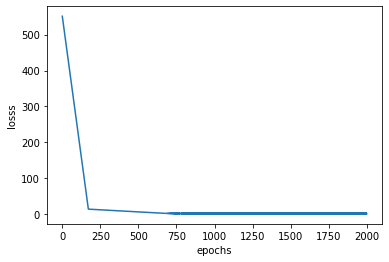

In [44]:
from matplotlib import pyplot as plt

ep = list(range(EPOCHS))
plt.plot(ep, losses)
plt.xlabel('epochs')
plt.ylabel('losss')
plt.show()

In [ ]:
# https://medium.com/analytics-vidhya/tf-gradienttape-explained-for-keras-users-cc3f06276f22